In [1]:
import os
import cv2

import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
tumour_images=[]
for name in glob.glob('./brain_tumor_dataset/yes/*jpg'):
    image = cv2.imread(name)
    image = cv2.resize(image, (240,240))
    tumour_images.append(image)

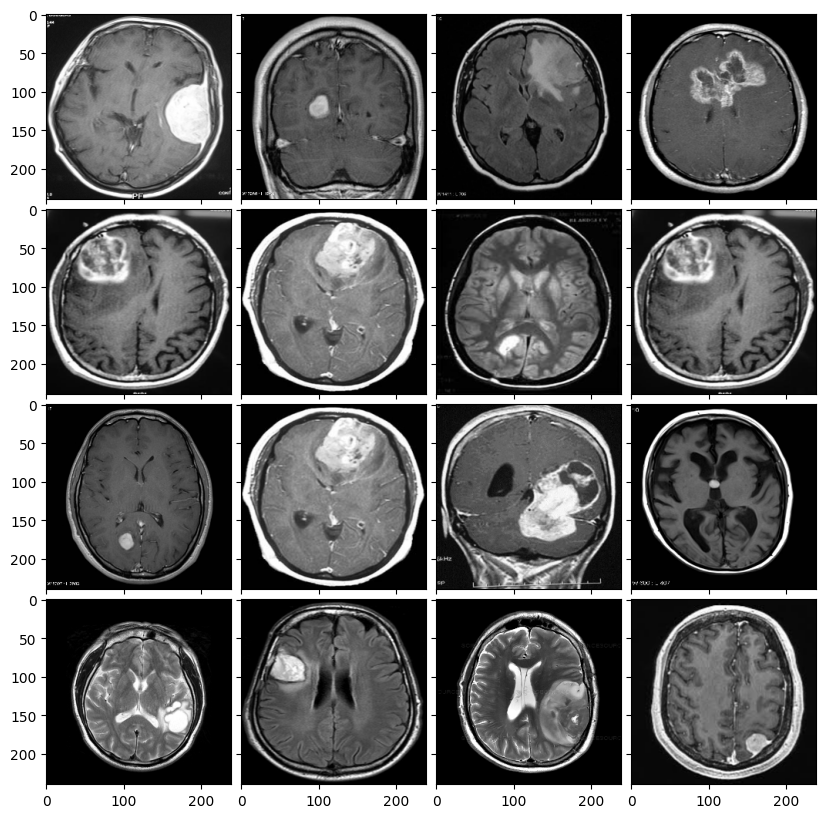

In [3]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4),  axes_pad=0.1,   )
for ax, im in zip(grid, tumour_images[0:16]):
    ax.imshow(im)
plt.show()

In [4]:
img_path = "./brain_tumor_dataset/yes/Y4.jpg"
img = cv2.imread(img_path)
no_noise = []
for i in range(len(img)):
    blur = cv2.GaussianBlur(img[i],(5,5),0)
    no_noise.append(blur)

img = no_noise[1]

In [5]:
img_path = "./brain_tumor_dataset/yes/Y4.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500, 590)
image = cv2.resize(image, dim)

width: 225 pixels
height: 225 pixels
channels: 3


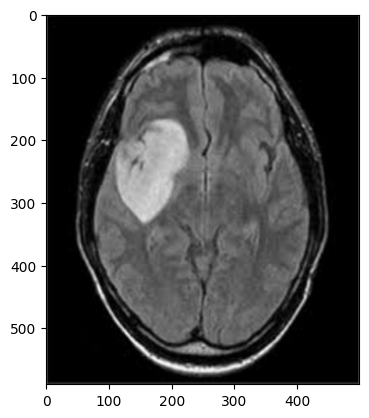

In [6]:
plt.imshow(image)

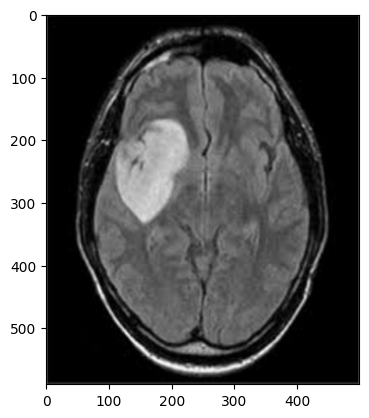

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

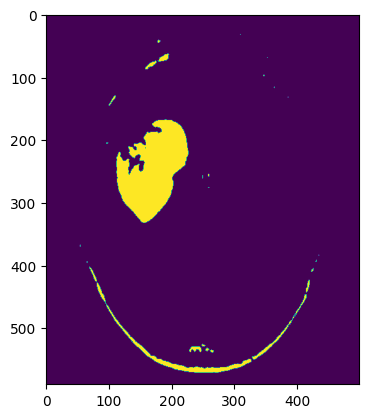

In [8]:
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

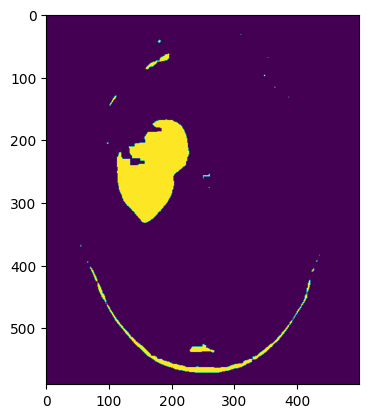

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

In [10]:
closed = cv2.erode(closed, None, iterations=19)
closed = cv2.dilate(closed, None, iterations=17)

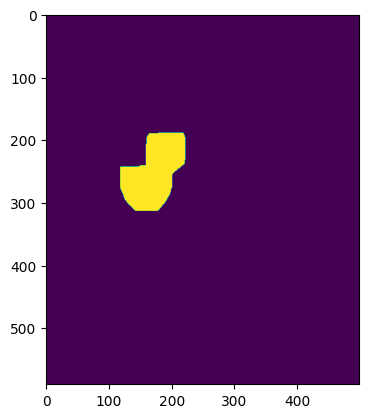

In [11]:
plt.imshow(closed)

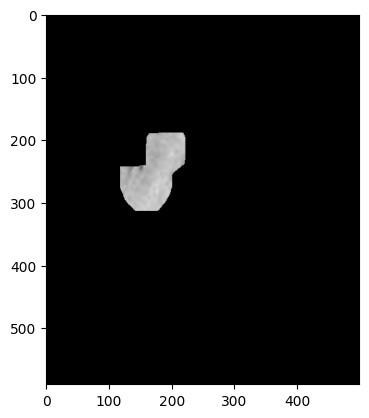

In [12]:
rst, mask = cv2.threshold(closed, 155, 155, cv2.THRESH_BINARY)
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
plt.imshow(final)

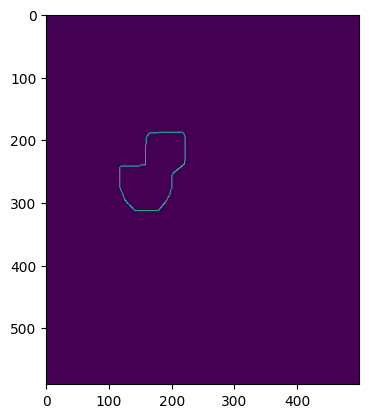

In [13]:
def auto_cany(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0,(1.0 - sigma)* v))
    upper = int(min(255, (1.0 + sigma)* v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged
canny = auto_cany(closed)
plt.imshow(canny)

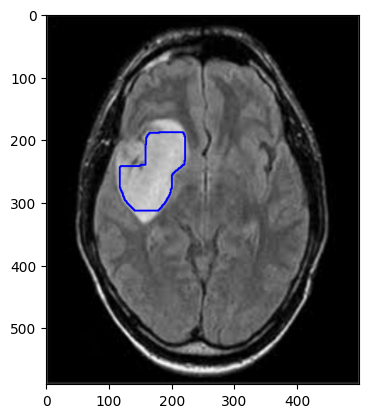

In [14]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
plt.imshow(image) 

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
# from keras.utils.np_utils import to_categorica
from keras.utils import to_categorical

In [19]:
os.listdir('./brain_tumor_dataset')

['no', 'yes']

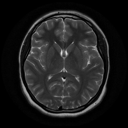

In [24]:
im = Image.open('./brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

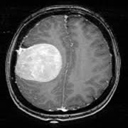

In [26]:
im = Image.open('./brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im


In [27]:
yes=os.listdir('./brain_tumor_dataset/yes')
no=os.listdir('./brain_tumor_dataset/no')

In [28]:
data = np.concatenate([yes, no])
len(data) == len(yes) + len(no)

True

In [29]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [33]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
data

array(['Y184.JPG', 'Y255.JPG', 'Y103.jpg', 'Y51.jpg', 'Y26.jpg',
       'Y25.jpg', 'Y181.jpg', 'Y169.jpg', 'Y60.jpg', 'Y65.JPG',
       'Y249.JPG', 'Y15.jpg', 'Y166.JPG', 'Y6.jpg', 'Y248.JPG', 'Y13.jpg',
       'Y104.jpg', 'Y188.jpg', 'Y90.jpg', 'Y156.JPG', 'Y7.jpg',
       'Y162.jpg', 'Y56.jpg', 'Y146.JPG', 'Y59.JPG', 'Y89.JPG', 'Y75.JPG',
       'Y49.JPG', 'Y28.jpg', 'Y78.jpg', 'Y153.jpg', 'Y100.JPG',
       'Y155.JPG', 'Y193.JPG', 'Y98.JPG', 'Y253.JPG', 'Y41.jpg',
       'Y30.jpg', 'Y195.JPG', 'Y111.JPG', 'Y10.jpg', 'Y77.jpg', 'Y40.JPG',
       'Y107.jpg', 'Y112.JPG', 'Y113.JPG', 'Y246.JPG', 'Y250.jpg',
       'Y67.JPG', 'Y1.jpg', 'Y9.jpg', 'Y159.JPG', 'Y92.jpg', 'Y102.jpg',
       'Y20.jpg', 'Y23.JPG', 'Y105.jpg', 'Y8.jpg', 'Y187.jpg', 'Y157.JPG',
       'Y31.jpg', 'Y154.jpg', 'Y3.jpg', 'Y180.jpg', 'Y22.jpg', 'Y79.jpg',
       'Y147.JPG', 'Y50.JPG', 'Y116.JPG', 'Y245.jpg', 'Y165.JPG',
       'Y106.jpg', 'Y11.jpg', 'Y256.JPG', 'Y86.JPG', 'Y2.jpg', 'Y109.JPG',
       'Y148.JPG', 'Y55